In [1]:
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as stats
pd.plotting.register_matplotlib_converters()
from sklearn import svm
from imblearn.over_sampling import SMOTE

In [2]:
#df.drop(['ssc_b','hsc_b'], axis=1, inplace=True)

In [3]:
df=pd.read_csv('Placement_Data_Full_Class_1.csv')


In [4]:
df.head()

,Unnamed: 0,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df.status=pd.get_dummies(df.status,drop_first=True)

In [6]:
X=df.drop(['salary','status','Unnamed: 0','sl_no'],axis=1)
y=df['status']

In [7]:
X.gender=pd.get_dummies(X.gender,drop_first=True)

In [8]:
X.ssc_b=pd.get_dummies(X.ssc_b,drop_first=True)

In [9]:
X.hsc_b=pd.get_dummies(X.hsc_b,drop_first=True)

In [10]:
X.hsc_s=pd.get_dummies(X.hsc_s,drop_first=True)

In [11]:
X.workex=pd.get_dummies(X.workex,drop_first=True)

In [12]:
X.specialisation=pd.get_dummies(X.specialisation,drop_first=True)

In [13]:
degree_t=pd.get_dummies(df.degree_t,drop_first=True)

In [14]:
X=pd.concat([X,degree_t],axis=1)

In [15]:
X.drop("degree_t",axis=1,inplace=True)

Text(0, 0.5, 'Frequency')

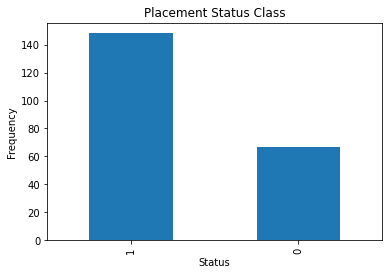

In [16]:
y.value_counts().plot(kind="bar")
plt.title('Placement Status Class')
plt.xlabel('Status')
plt.ylabel('Frequency')

In [17]:
sm=SMOTE(random_state=0)
X,y=sm.fit_sample(X,y)


Text(0, 0.5, 'Frequency')

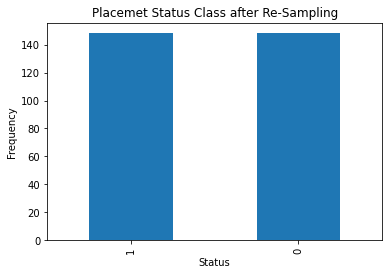

In [18]:
y.value_counts().plot(kind="bar")
plt.title('Placemet Status Class after Re-Sampling')
plt.xlabel('Status')
plt.ylabel('Frequency')

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
xtrain.shape,xtest.shape

((236, 13), (60, 13))

In [22]:
xtrain_res=xtrain.copy()

In [23]:
ytrain_res=ytrain.copy()

In [24]:
#xtrain_res,ytrain_res=sm.fit_sample(xtrain,ytrain.ravel())

In [25]:
xtrain_res.shape,ytrain_res.shape

((236, 13), (236,))

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score,GridSearchCV

In [27]:
#scaler=StandardScaler()
#scaled_xtrain=scaler.fit_transform(xtrain_res)
#scaled_xtest=scaler.transform(xtest)

In [28]:
rf=RandomForestClassifier()

In [29]:
#param_grid = { 
#    'n_estimators': [50,100,150,200,250,300,350,400,450,500],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'max_depth' : range(1,12),
#    'criterion' :['gini', 'entropy']
#}

In [30]:
parameters_xg = {'max_depth':[3,6,7], 'learning_rate': [0.1,0.2], 'n_estimators': [300,200], 
                 'min_child_weight': [4], 'reg_alpha': [6,0], 'reg_lambda': [1,8],'max_delta_step':[2],
                 'gamma':[0],'seed':[1]}

parameters_svm = {'C':[0.9,0.01],'kernel':['rbf','linear'], 'gamma':['auto'], 'probability':[True,False],
                  'random_state':[0,7,16],'decision_function_shape':['ovo','ovr'],'degree':[3,4,10]}

parameters_rf = {'n_estimators': [100,50], 'max_features': [7,'auto',None],
                 'n_jobs': [-1], 'min_samples_leaf': [2,4,], 'random_state':[1,7,], 
                 'min_samples_split':[2,6,], 'oob_score': [True,False],
                 'criterion': ['gini'], 'warm_start': [True,False]}

In [31]:
#CV_rfc = GridSearchCV(estimator=rf, param_grid=parameters_rf, cv= 5)
#CV_rfc.fit(X, y)

In [32]:
#CV_rfc.best_params_

In [33]:
rfc1=RandomForestClassifier(random_state=42, criterion= 'gini',
                            max_features= 7,
                            min_samples_leaf=2,
                            min_samples_split= 2,
                            n_estimators=50,
                            n_jobs=-1,
                            oob_score= True,
                            warm_start= True)

In [34]:

rfc1.fit(xtrain_res,ytrain_res)

RandomForestClassifier(max_features=7, min_samples_leaf=2, n_estimators=50,
                       n_jobs=-1, oob_score=True, random_state=42,
                       warm_start=True)

In [35]:
rf_ypredict=rfc1.predict(xtest)

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [37]:
print(classification_report(ytest,rf_ypredict))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86        36
           1       0.77      0.83      0.80        24

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60



In [38]:
# XGBoost Classifier
from xgboost import XGBClassifier

In [39]:
xgb_classifier=XGBClassifier()

In [40]:
#CV_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=parameters_xg, cv= 5)
#CV_xgb.fit(X, y)

In [41]:
#CV_xgb.best_params_


In [105]:
xgb = XGBClassifier(gamma=0,
                    learning_rate=0.1,
                    max_delta_step=2,
                    max_depth= 6,min_child_weight=4,
                    n_estimators=200,reg_alpha=0,
                    reg_lambda=8,seed=1)

In [106]:
xgb_classifier.fit(xtrain_res,ytrain_res)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [107]:
xgb_ypredict=xgb_classifier.predict(xtest)

In [108]:
print(classification_report(ytest,xgb_ypredict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        36
           1       0.82      0.75      0.78        24

    accuracy                           0.83        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.83      0.83      0.83        60



In [109]:
from sklearn.svm import SVC

In [110]:
svm_classifier=SVC()

In [111]:
#CV_svm = GridSearchCV(estimator=svm_classifier, param_grid=parameters_svm, cv= 5)
#CV_svm.fit(X, y)

In [112]:
#CV_svm.best_params_

In [113]:
svm = SVC(C=0.01,
          decision_function_shape= 'ovo',
          degree= 3,
          gamma= 'auto',
          kernel= 'linear',
          probability= True, random_state=0)

In [114]:
svm.fit(xtrain_res,ytrain_res)


SVC(C=0.01, decision_function_shape='ovo', gamma='auto', kernel='linear',
    probability=True, random_state=0)

In [115]:
svm_ypred=svm.predict(xtest)

In [116]:
print(classification_report(ytest,svm_ypred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        36
           1       0.85      0.92      0.88        24

    accuracy                           0.90        60
   macro avg       0.89      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



In [117]:
#feature importance

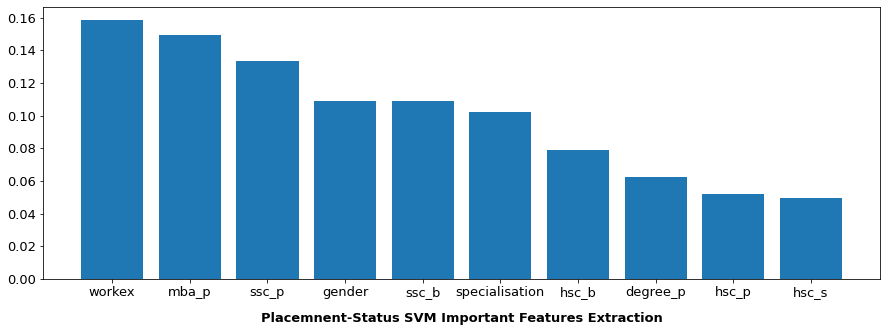

In [119]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.figure(figsize=(15,5))
    #sns.lineplot(x=range(top),y=imp[::-1][0:top],ci=None,marker='o')
    plt.bar(range(top), imp[::-1][0:top], align='center')
    plt.xticks(range(top), names[::-1][0:top])
    plt.title("Placemnent-Status SVM Important Features Extraction",fontsize=13,y=-0.18,fontweight='bold')
    plt.tick_params(labelsize=13)
    plt.savefig('Fig12.eps')
    plt.show()

# whatever your features are called
features_names = X.columns 
# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(svm.coef_[0]), features_names, top=10)



In [56]:
#logistic regression

In [57]:
lr=LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
lr.fit(xtrain_res,ytrain_res)
lr_yrped=lr.predict(xtest)


In [58]:
print(classification_report(ytest,lr_yrped))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



In [59]:
rows=list(X.columns)
imp=pd.DataFrame(np.zeros(6*len(rows)).reshape(2*len(rows),3))
imp.columns=['Classifier',"Feature","Importnace"]
for index in range(0,2*len(rows),2):
    imp.iloc[index]=["Random Forest",rows[index//2],(100*rfc1.feature_importances_[index//2])]
    imp.iloc[index+1]=["XGB Classifier",rows[index//2],(100*xgb_classifier.feature_importances_[index//2])]
    

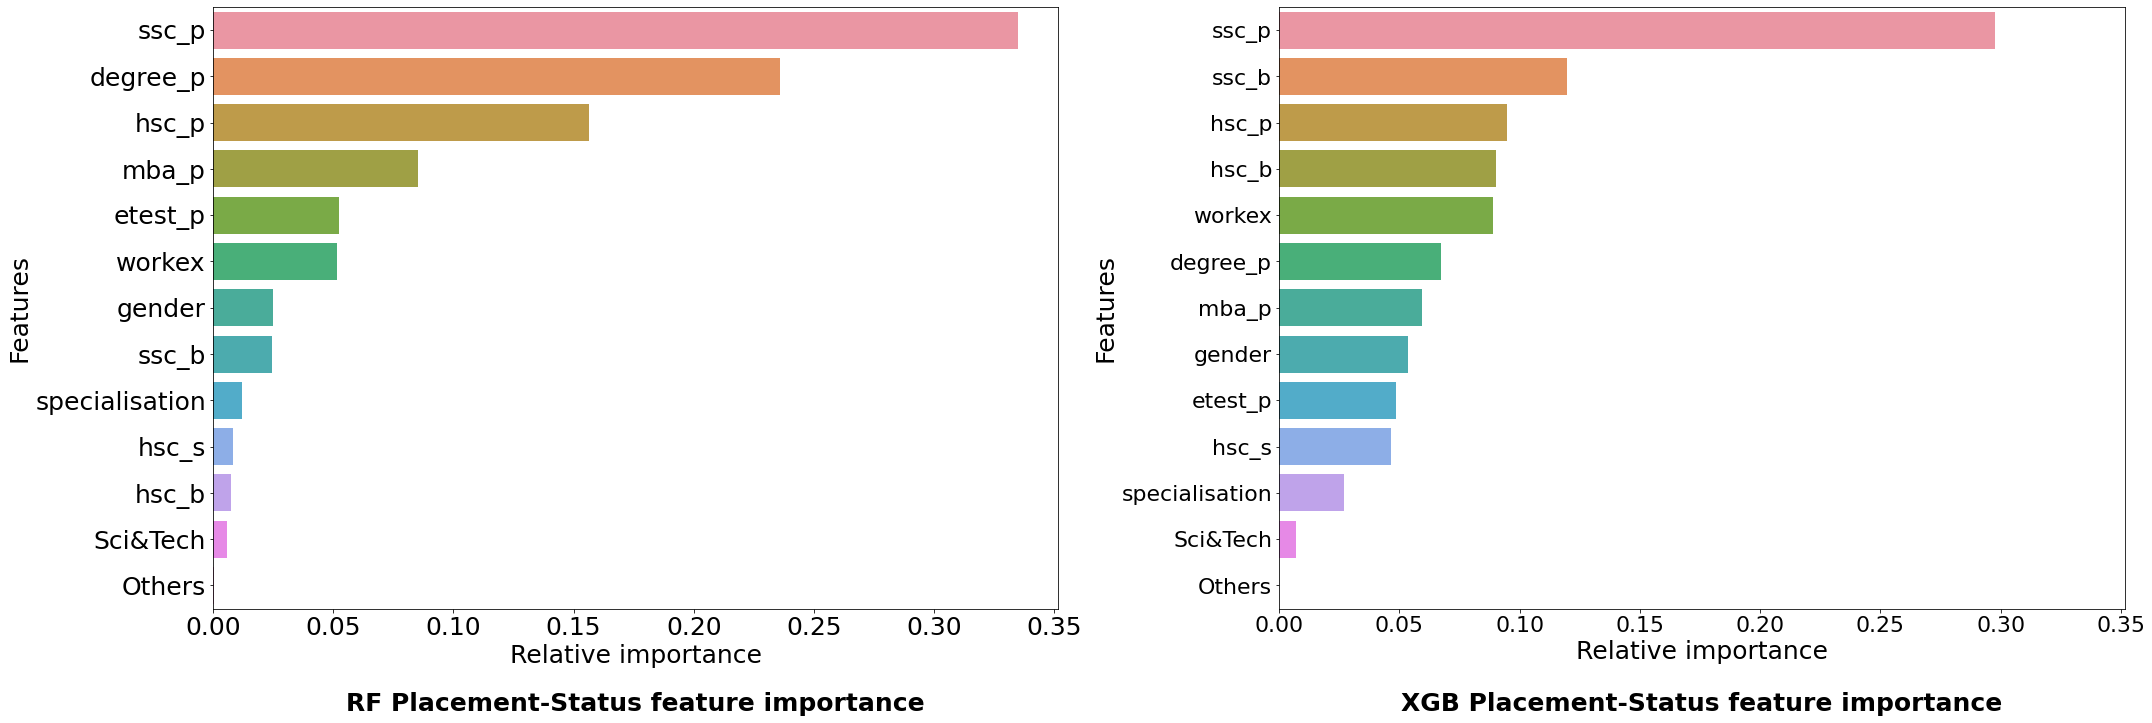

In [62]:
nrows =1
ncols=2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(30,10))

names_classifiers = [("RF Placement-Status",rfc1),("XGB Placement-Status",xgb_classifier)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[col])
        g.set_xlabel("Relative importance",fontsize=25)
        g.set_ylabel("Features",fontsize=25)
        g.tick_params(labelsize=25)
        g.set_title(name + " feature importance",fontsize=25,y=-0.18,fontweight='bold')
        plt.tick_params(labelsize=22)
        nclassifier += 1
plt.tight_layout()
plt.savefig('fig13.eps')

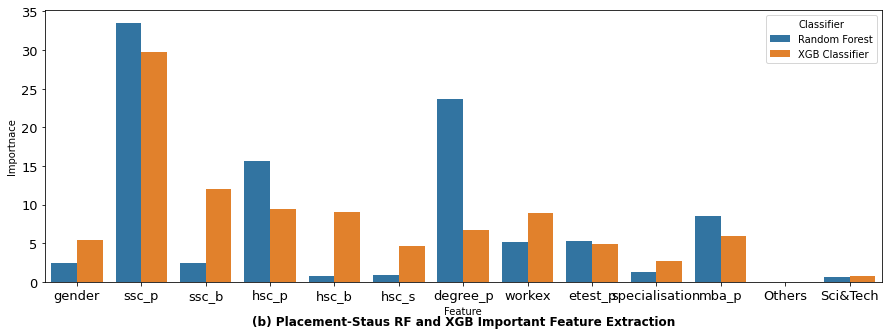

In [63]:
plt.figure(figsize=(15,5))
sns.barplot("Feature","Importnace",hue="Classifier",data=imp)
plt.title("(b) Placement-Staus RF and XGB Important Feature Extraction",y=-0.18,fontweight='bold')
#plt.savefig('fig11(b).eps')
plt.tick_params(labelsize=13)
plt.show()

In [62]:
#Mean Decrease Accuracy Feature Importance
import eli5
from eli5.sklearn import PermutationImportance

C:\Users\princ\Anaconda2\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

C:\Users\princ\Anaconda2\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.

Using TensorFlow backend.


In [63]:
perm=PermutationImportance(svm).fit(xtrain_res,ytrain_res)
perm1=PermutationImportance(xgb_classifier).fit(xtrain_res,ytrain_res)
perm2=PermutationImportance(rfc1).fit(xtrain_res,ytrain_res)
eli5.show_weights(perm)

Weight,Feature
0.2415 ± 0.0169,x1
0.0619 ± 0.0337,x10
0.0492 ± 0.0276,x3
0.0212 ± 0.0186,x8
0.0195 ± 0.0218,x6
0.0051 ± 0.0034,x7
0.0051 ± 0.0063,x2
0.0042 ± 0.0000,x9
0.0034 ± 0.0063,x0
0 ± 0.0000,x12


In [64]:
eli5.show_weights(perm1)

Weight,Feature
0.2458 ± 0.0497,x1
0.0669 ± 0.0136,x3
0.0644 ± 0.0248,x10
0.0568 ± 0.0231,x6
0.0458 ± 0.0112,x7
0.0186 ± 0.0102,x8
0.0136 ± 0.0063,x2
0 ± 0.0000,x12
0 ± 0.0000,x11
0 ± 0.0000,x9


In [65]:
eli5.show_weights(perm2)

Weight,Feature
0.2839 ± 0.0367,x1
0.0746 ± 0.0086,x6
0.0669 ± 0.0173,x3
0.0432 ± 0.0099,x10
0.0398 ± 0.0225,x7
0.0186 ± 0.0127,x8
0.0093 ± 0.0063,x0
0.0059 ± 0.0086,x5
0.0051 ± 0.0083,x4
0.0042 ± 0.0076,x9


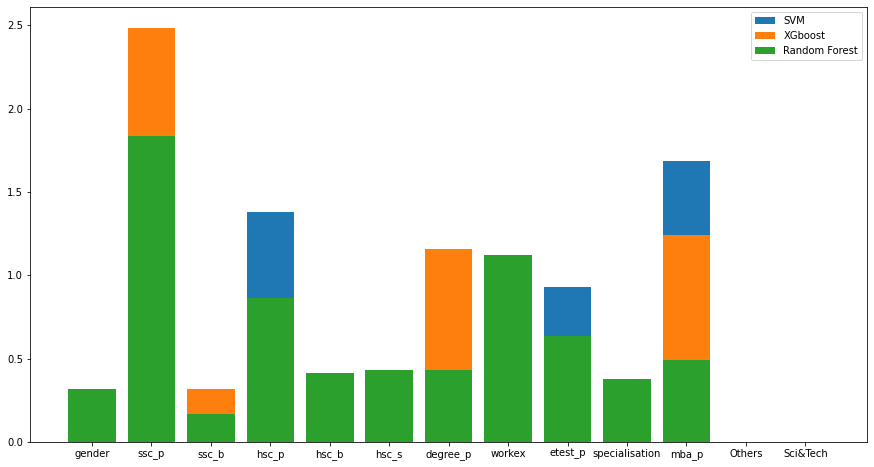

In [66]:

plt.figure(figsize=(15,8))
plt.bar(rows,perm.feature_importances_std_*100)
plt.bar(rows,perm1.feature_importances_std_*100)
plt.bar(rows,perm2.feature_importances_std_*100)
plt.legend(["SVM","XGboost","Random Forest"])
plt.show()

In [67]:
# Subplot of confusion matrix

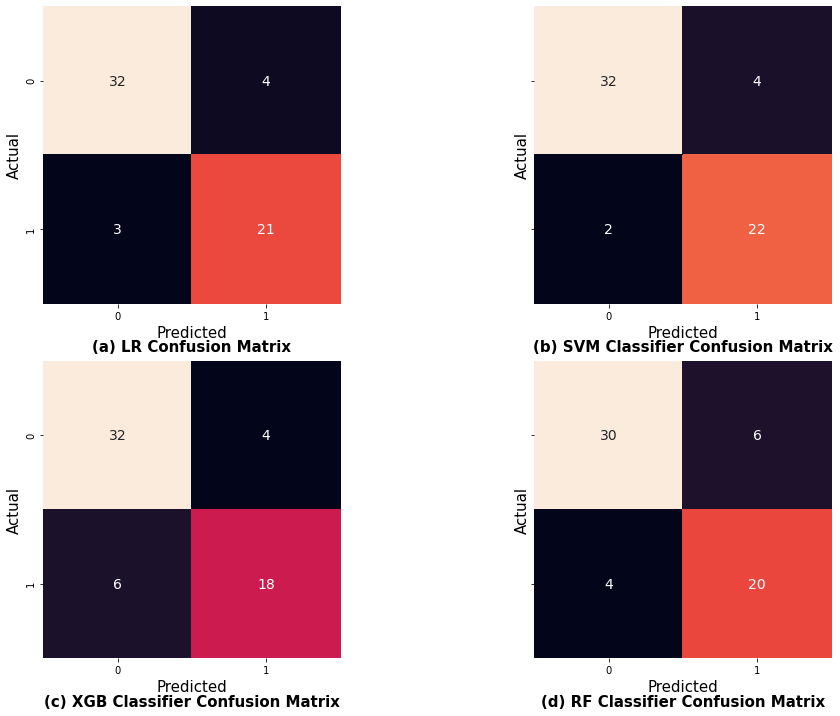

In [77]:
fig,axes=plt.subplots(2,2,figsize=(15,10),sharey=True)
plt.subplots_adjust(bottom=0, top=0.8, hspace=0.1)

sns.heatmap(confusion_matrix(ytest,lr_yrped),annot=True,ax=axes[0,0],annot_kws={'size':14},cbar=False,
                square=True)
axes[0,0].set_title("(a) LR Confusion Matrix",fontsize=15,y=-0.18,fontweight='bold')

sns.heatmap(confusion_matrix(ytest,svm_ypred),annot=True,ax=axes[0,1],annot_kws={'size':14},cbar=False,
                square=True)
axes[0,1].set_title("(b) SVM Classifier Confusion Matrix",fontsize=15,y=-0.18,fontweight='bold')

sns.heatmap(confusion_matrix(ytest,xgb_ypredict),annot=True,ax=axes[1,0],annot_kws={'size':14},cbar=False,
                square=True)
axes[1,0].set_title("(c) XGB Classifier Confusion Matrix",fontsize=15,y=-0.18,fontweight='bold')

sns.heatmap(confusion_matrix(ytest,rf_ypredict),annot=True,ax=axes[1,1],annot_kws={'size':14},cbar=False,
                square=True)
axes[1,1].set_title("(d) RF Classifier Confusion Matrix",fontsize=15,y=-0.18,fontweight='bold')

axes[0,0].set_xlabel('Predicted',fontsize=15)
axes[0,0].set_ylabel('Actual',fontsize=15)
axes[0,1].set_xlabel('Predicted',fontsize=15)
axes[0,1].set_ylabel('Actual',fontsize=15)
axes[1,0].set_xlabel('Predicted',fontsize=15)
axes[1,0].set_ylabel('Actual',fontsize=15)
axes[1,1].set_xlabel('Predicted',fontsize=15)
axes[1,1].set_ylabel('Actual',fontsize=15)
plt.tight_layout()
plt.savefig('Fig9.eps')
#plt.savefig('All Model Confusion Matrix.png')


In [69]:
#Roc curve

In [70]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)


In [71]:
# Logistic regression
modelLR = LogisticRegression(solver='lbfgs', max_iter=10000)
modelLR.fit(xtrain_res,ytrain_res)
y_pred_prob_lr = modelLR.predict_proba(xtest)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(ytest, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(ytest, y_pred_prob_lr)


# SVM with linear
modelSVMlinear=SVC(C=0.01,
          decision_function_shape= 'ovo',
          degree= 3,
          gamma= 'auto',
          kernel= 'linear',
          probability= True, random_state=0)
modelSVMlinear.fit(xtrain_res,ytrain_res)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(xtest)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(ytest, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(ytest, y_pred_prob_SVMlinear)


# Random forest
modelRF= RandomForestClassifier(random_state=42, criterion= 'gini',
                            max_features= 7,
                            min_samples_leaf=2,
                            min_samples_split= 2,
                            n_estimators=50,
                            n_jobs=-1,
                            oob_score= True,
                            warm_start= True)
modelRF.fit(xtrain_res,ytrain_res)
y_pred_prob_rf = modelRF.predict_proba(xtest)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(ytest, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(ytest, y_pred_prob_rf)

modelxg= XGBClassifier(gamma=0,
                    learning_rate=0.1,
                    max_delta_step=2,
                    max_depth= 6,min_child_weight=4,
                    n_estimators=200,reg_alpha=0,
                    reg_lambda=8,seed=1)
modelxg.fit(xtrain_res,ytrain_res)
y_pred_prob_xg = modelxg.predict_proba(xtest)[:,1]
fpr_xg, tpr_xg, thresholds_xg = roc_curve(ytest, y_pred_prob_xg)
roc_auc_xg = auc(fpr_xg, tpr_xg)
precision_xg, recall_xg, th_xg = precision_recall_curve(ytest, y_pred_prob_xg)



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


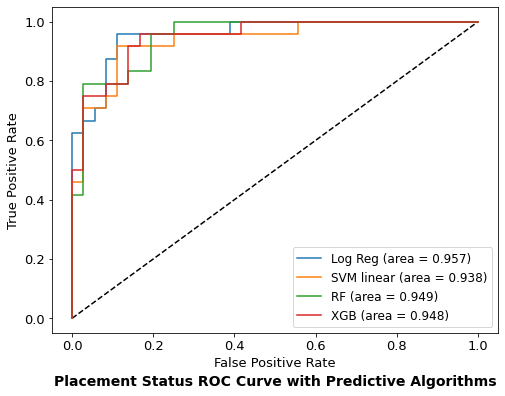

In [72]:
# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_xg, tpr_xg, label='XGB (area = %0.3f)' % roc_auc_xg)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.tick_params(labelsize=13)
plt.xlabel('False Positive Rate',fontsize=13)
plt.ylabel('True Positive Rate',fontsize=13)
plt.title("Placement Status ROC Curve with Predictive Algorithms",fontsize=14,y=-0.18,fontweight='bold')
plt.legend(loc=0, prop={'size': 12})

plt.savefig('Fig10.eps')
plt.show()
#plt.savefig('All ROC curve.png')

In [73]:
#Precision Recall curve

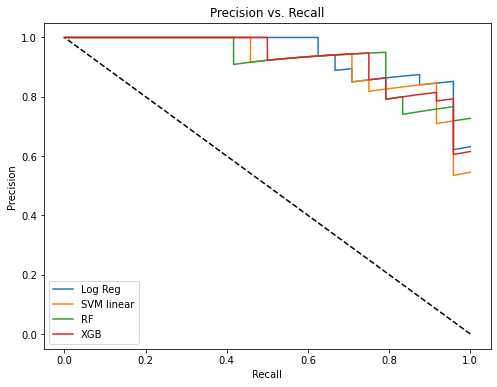

In [74]:
plt.figure(figsize=(8,6))
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Log Reg')
plt.plot(recall_SVMlinear, precision_SVMlinear, label='SVM linear')
plt.plot(recall_rf, precision_rf, label='RF')
plt.plot(recall_xg, precision_xg, label='XGB')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()